In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Kangkong,2001
1,Streer Paona,1991
2,Ha-Simla,1969
3,Soho Conspiracy,1950
4,Firelight,1964


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [10]:
b = c[(c.character == 'Superman') | (c.character == 'Batman')]
b.head()

,title,year,name,type,character,n
1098,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
16738,Batman v Superman: Dawn of Justice,2016,Ben Affleck,actor,Batman,1.0
16764,Justice League,2017,Ben Affleck,actor,Batman,NaN
16779,Suicide Squad,2016,Ben Affleck,actor,Batman,NaN
48470,Atom Man vs. Superman,1950,Kirk Alyn,actor,Superman,1.0


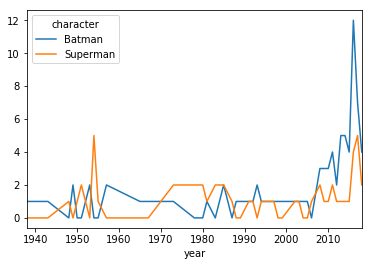

In [39]:
a = b.groupby(['year', 'character']).size()
a = a.unstack()
a = a.fillna(0)
a.plot()

In [40]:
a.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [46]:
d = a.Superman - a.Batman
len(d[d > 0.0])

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [47]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [49]:
b = c[(c.character == 'Batman') | (c.character == 'Superman')]

In [52]:
b = b.groupby(['year', 'character']).size()

In [53]:
b.head()

year  character
1938  Batman       1
1940  Batman       1
1943  Batman       1
1948  Superman     1
1949  Batman       2
dtype: int64

In [70]:
b = b.unstack().fillna(0)
d = b.Batman - b.Superman
len(d[d > 0.0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [71]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


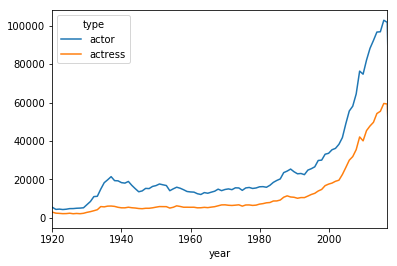

In [101]:
c.groupby(['type', 'year']).size().unstack('type').fillna(0).plot(xlim=[1920, 2017])

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

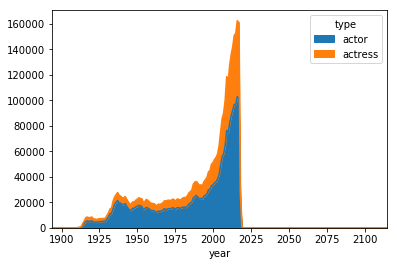

In [102]:
c.groupby(['type', 'year']).size().unstack('type').fillna(0).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [103]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


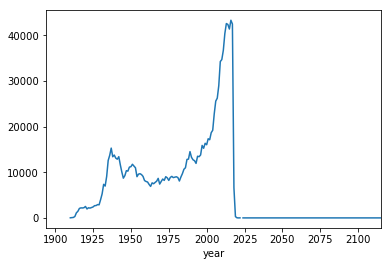

In [125]:
a = c.groupby(['type', 'year']).size().unstack('type')#.fillna(0)
d = a.actor - a.actress
d.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [115]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


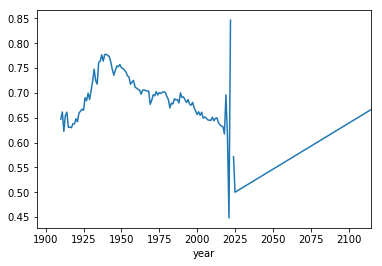

In [124]:
a = c.groupby(['type', 'year']).size().unstack('type')#.fillna(0)
(a.actor / (a.actor + a.actress)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [126]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [131]:
c = c[c.n == 2]
c.head()

,title,year,name,type,character,n
96,Big Apple,2002,Angel 11:11,actor,Angel,2.0
121,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2.0
231,Chistilische,2017,Sergey A.,actor,Criminal,2.0
232,Chistilische,2017,Sergey A.,actor,Demon,2.0
235,Interstelar,2014,Sergey A.,actor,Sergey Sergeevich,2.0


In [140]:
c = c.groupby(['year', 'type']).size().unstack('type')
c.head()

type,actor,actress
year,,
1906,2.0,1.0
1907,1.0,NaN
1908,2.0,NaN
1910,2.0,2.0
1911,14.0,5.0


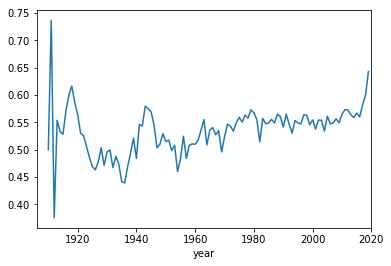

In [141]:
(c.actor / (c.actor + c.actress)).plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [152]:
c = cast
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [153]:
a = c[c.n < 4]
a.head()

,title,year,name,type,character,n
96,Big Apple,2002,Angel 11:11,actor,Angel,2.0
100,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
121,Asad wa arbaa qutat,2007,4 Cats,actor,Themselves,2.0
136,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
137,Caught in the Crossfire,2010,50 Cent,actor,Tino,3.0


In [154]:
a = a.groupby(['n', 'type', 'year']).size().unstack('type').fillna(0)
a.head()

type      actor  actress
n   year                
1.0 1906    2.0      1.0
    1907    1.0      0.0
    1908    1.0      0.0
    1909    1.0      0.0
    1910    1.0      4.0

In [155]:
r = (a.actor / (a.actor + a.actress))
r.head()

n    year
1.0  1906    0.666667
     1907    1.000000
     1908    1.000000
     1909    1.000000
     1910    0.200000
dtype: float64

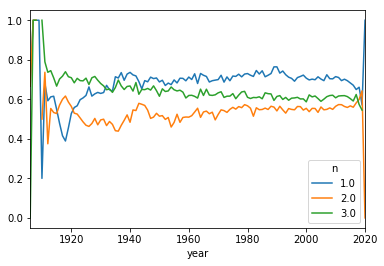

In [157]:
r.unstack('n').plot()